<a href="https://colab.research.google.com/github/taegukang35/device_for_blind/blob/main/warping_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf

In [ ]:
!git clone https://github.com/taegukang35/device_for_blind

Cloning into 'device_for_blind'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 75 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [ ]:
model = load_model('/content/device_for_blind/model-best-unet.h5')

In [ ]:
def plot_results(i,img):
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    fig = plt.figure()     
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(img)
    ax1.set_title('image')
    ax1.axis("off")
    img = np.asarray(img).astype('float32')
    img = np.expand_dims(img,axis=0)
    mask = model.predict(img)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(mask[0][:,:,0])
    ax2.set_title('mask')
    ax2.axis("off")
    #plt.savefig('/content/model_result/result{0}.png'.format(i))

def create_mask(img):
    #img = cv2.imread(file_path)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    fig = plt.figure()     
    rows = 1
    cols = 2
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(img)
    ax1.set_title('image')
    ax1.axis("off")
    img = np.asarray(img).astype('float32')
    img = np.expand_dims(img,axis=0)
    mask = model.predict(img)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(mask[0][:,:,0])
    ax2.set_title('mask')
    ax2.axis("off")
    return mask[0][...,0]
    #plt.savefig('/content/model_result/result{0}.png'.format(i))

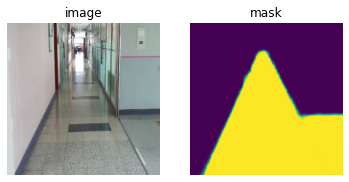

In [ ]:
file_path = '/content/drive/MyDrive/school_hallway_v2/images_train/490.png'

SIZE_X = 256 #Resize images (height  = X, width = Y)
SIZE_Y = 256
threshold = 0.5
img = cv2.imread(file_path)
img = cv2.resize(img, (SIZE_Y, SIZE_X))
image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mask = create_mask(img)
_,mask = cv2.threshold(mask,threshold*mask.max(),1,cv2.THRESH_BINARY)

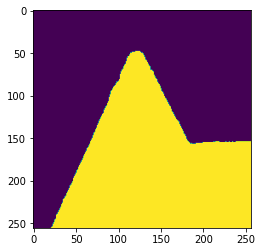

In [ ]:
plt.imshow(mask)

In [ ]:
#cv2.circle(img, (150, 100), 10, (255, 0 ,0), -1)
"""
cv2.circle(img, (115, 50), 10, (255, 0 ,0), -1)
cv2.circle(img, (135, 50), 10, (0, 255, 0), -1)
cv2.circle(img, (20, 250), 10, (0, 0, 255), -1)
cv2.circle(img, (230, 250), 10, (0, 255, 255), -1)
"""

pts1 = np.float32([[115,50],[135,50],[20,250],[230,250]])
pts2 = np.float32([[77,0],[180,0],[77,256],[180,256]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
result_img = cv2.warpPerspective(img,matrix,(256,256))
result_mask = cv2.warpPerspective(mask,matrix,(256,256))

In [ ]:
print(matrix)

[[-3.74545455e+00 -4.43909091e+00  5.96681818e+02]
 [ 1.97716240e-15 -9.77454545e+00  4.88727273e+02]
 [ 2.43988103e-18 -3.45454545e-02  1.00000000e+00]]


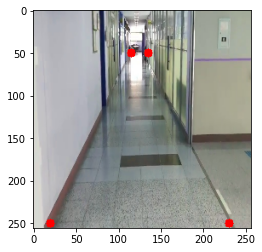

In [ ]:
cv2.circle(img, (115, 50), 5, (255, 0 ,0), -1)
cv2.circle(img, (135, 50), 5, (255, 0, 0), -1)
cv2.circle(img, (20, 250), 5, (255, 0, 0), -1)
cv2.circle(img, (230, 250), 5, (255, 0, 0), -1)
plt.imshow(img)

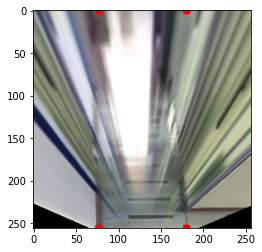

In [ ]:
cv2.circle(result_img, (77, 0), 5, (255, 0, 0), -1)
cv2.circle(result_img, (180, 0), 5, (255, 0, 0), -1)
cv2.circle(result_img, (77, 256), 5, (255, 0, 0), -1)
cv2.circle(result_img, (180, 256), 5, (255, 0, 0), -1)
plt.imshow(result_img)

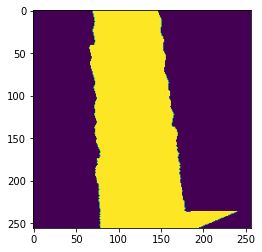

In [ ]:
_,result_mask = cv2.threshold(result_mask,threshold*result_mask.max(),1,cv2.THRESH_BINARY)
plt.imshow(result_mask)

#Warping Transformation

In [ ]:
def transform(file_path):
    SIZE_X = 256 #Resize images (height  = X, width = Y)
    SIZE_Y = 256
    img = cv2.imread(file_path)
    img = cv2.resize(img, (SIZE_Y, SIZE_X))
    image = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    #cv2.circle(image, (120, 160), 10, (255, 0 ,0), -1)
    
    fig = plt.figure(figsize=(20,10))  
    rows = 1
    cols = 4
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(image)
    ax1.set_title('image')
    ax1.axis("off")
    img = np.asarray(image).astype('float32')
    img = np.expand_dims(img,axis=0)
    mask = model.predict(img)
    threshold = 0.5
    _, mask = cv2.threshold(mask[0][...,0], threshold * mask[0][...,0].max(), 1, cv2.THRESH_BINARY)
    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(mask)
    ax2.set_title('mask')
    ax2.axis("off")

    pts1 = np.float32([[115,50],[135,50],[20,250],[230,250]])
    pts2 = np.float32([[77,0],[180,0],[77,256],[180,256]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    result_img = cv2.warpPerspective(image,matrix,(256,256))
    result_mask = cv2.warpPerspective(mask,matrix,(256,256))

    _,result_mask = cv2.threshold(result_mask,threshold*result_mask.max(),1,cv2.THRESH_BINARY)
    ax3 = fig.add_subplot(rows, cols, 3)
    ax3.imshow(result_img)
    ax3.set_title('warped img')
    ax3.axis("off")
    ax4 = fig.add_subplot(rows, cols, 4)
    ax4.imshow(result_mask)
    ax4.set_title('warped mask')
    ax4.axis("off")
    return image,mask,result_img,result_mask

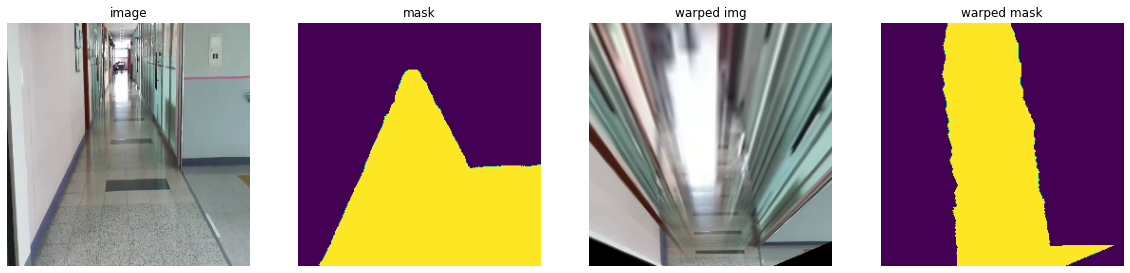

In [ ]:
result = transform('/content/drive/MyDrive/school_hallway_v2/images_train/90.png') #threshold 0.5

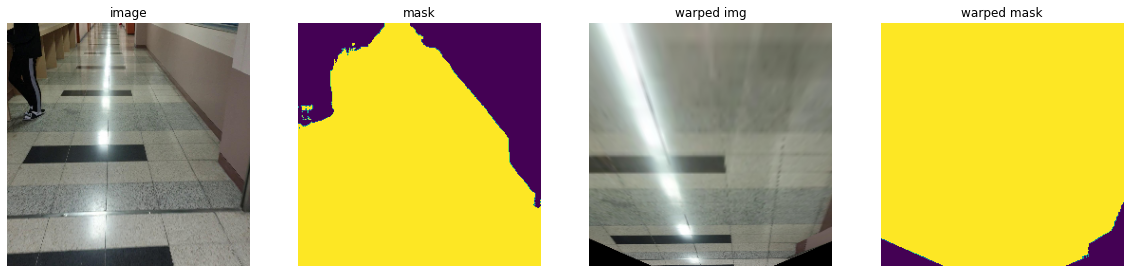

In [ ]:
_ = transform('/content/drive/MyDrive/stairhallway/hallway/hallway118.jpg')

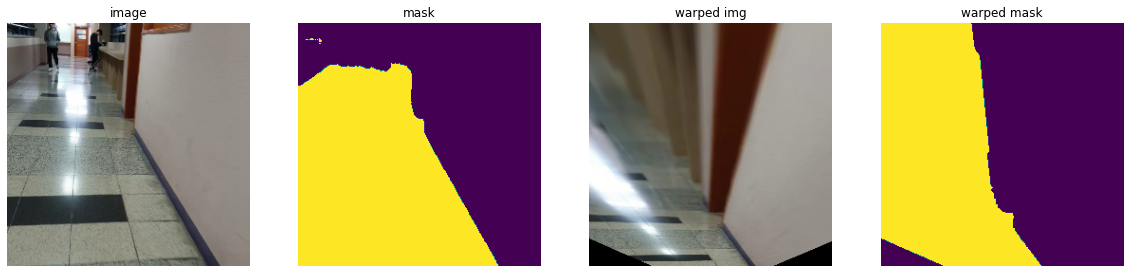

In [ ]:
_ = transform('/content/drive/MyDrive/stairhallway/hallway/hallway900.jpg')

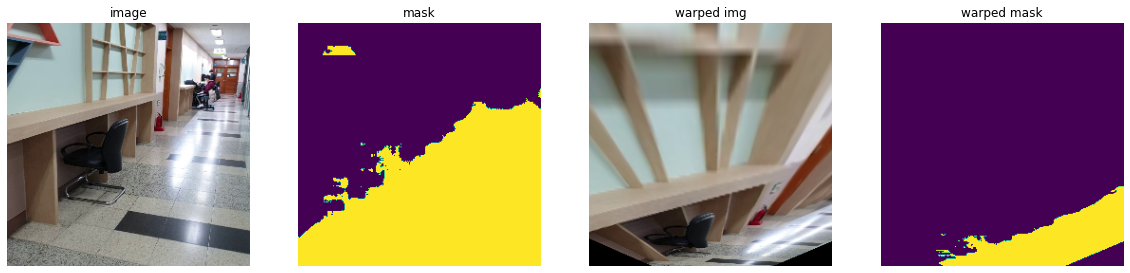

In [ ]:
_ = transform('/content/drive/MyDrive/stairhallway/hallway/hallway2180.jpg')

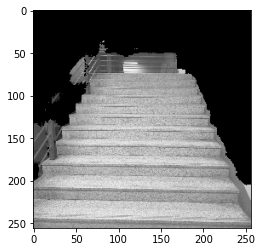

In [ ]:
plt.imshow(result[0][...,2]*result[1],cmap='gray')

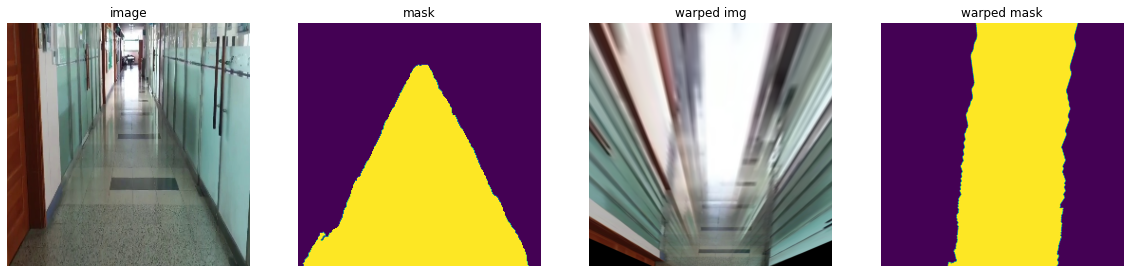

In [ ]:
result = transform('/content/drive/MyDrive/school_hallway_v2/images_train/580.png') 